In [2]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 10.1: Visualizing Monte Carlo Uncertainty

## Objectives

- To build intuition about the uncertainty in Monte Carlo estimates.

## Reminder

In the last two lectures, we repeatedly used the strong law of large numbers to estimate expectations using samples.
In particular, we studied  this integral:
$$
I = \mathbb{E}[g(X)]=\int g(x) p(x) dx,
$$
where $X\sim p(x)$ and $g(x)$ is a function of $x$.
The sampling-based approximation required $X_1,X_2,\dots$ be independent copies of $X$.
Then, we considered the random variables $Y_1 = g(X_1), Y_2 = g(X_2), \dots$, which are also independent and identically distributed.
The strong law of large states that their sampling average converges to their mean:
$$
\bar{I}_N=\frac{g(X_1)+\dots+g(X_N)}{N}=\frac{Y_1+\dots+Y_N}{N}\rightarrow I,\;\text{a.s.}
$$
This is the *Monte Carlo way for estimating integrals*.
If you played with the hands-on activities you probably noticed that for small $N$ we can get very different answers.
Here we will build some intuition about this epistemic uncertainty induced by finite samples.

### Example: 1D expectation
Let's try it out with a test function in 1D (Example 3.4 of Robert & Casella (2004)).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:
$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$
The correct value for the expectation can be found analytically and it is:
$$
\mathbb{E}[g(x)] = 0.965.
$$
Let's calculate the Monte Carlo estimate a few times and visualize its uncertainty:

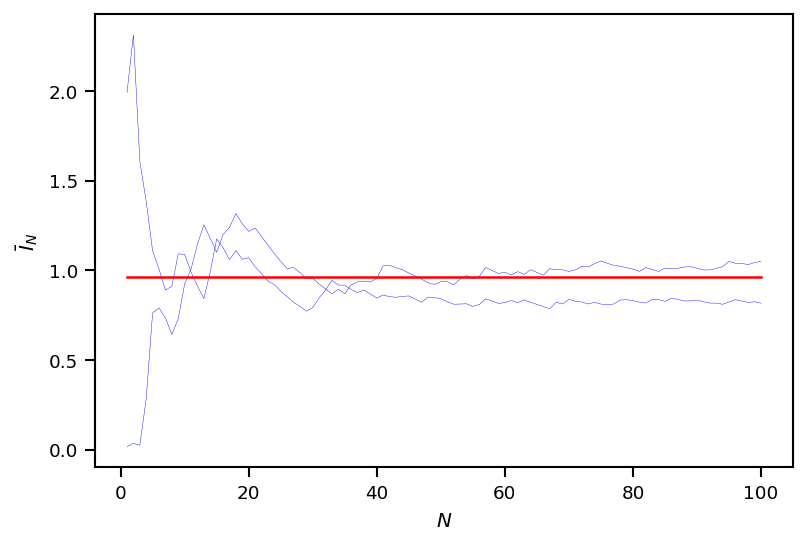

In [15]:
# The function of x we would like to consider
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# How many times do you want to run MC
num_mc = 2
# Number of samples to take
N = 100

# A common plot for all estimates
fig, ax = plt.subplots(dpi=150)
# So do it ``num_mc`` times:
for i in range(num_mc):
    # Generate samples from X
    x_samples = np.random.rand(N)
    # Get the corresponding Y's
    y_samples = g(x_samples)
    # Evaluate the sample average for all sample sizes (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
    I_running = np.cumsum(y_samples) / np.arange(1, N + 1)
    ax.plot(np.arange(1, N+1), I_running, 'b', lw=0.2)
# The true value
ax.plot(np.arange(1, N+1), [0.965] * N, color='r')
# and the labels
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{I}_N$');

+ Run the code 2-3 times to observe that every time you get a slightly different answer...
+ Set ``num_mc`` to 100 (or higher). Observe how different MC runs envelop the correct answer. This is epistemic uncertainty. How can we get it without running this repeatedly?
+ Now increase ``N`` to 10000 and see how the uncertainty dies off.